<h1> Building a Logistic Regression Model </h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./../../Dataset/cleaned_data.csv", index_col=0)

In [21]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
1601771,09/18/2013,6:10,BROOKLYN,40.664537,-73.997073,1.0,0.0,0,0,1,0,0,0
1662468,05/31/2013,14:35,BRONX,40.865020,-73.892760,0.0,0.0,0,0,0,0,0,0
1641810,06/15/2013,13:45,BROOKLYN,40.688212,-73.919810,0.0,0.0,0,0,0,0,0,0
1783688,11/04/2012,14:06,QUEENS,40.705641,-73.750470,1.0,0.0,0,0,0,0,1,0
218706,12/31/2019,19:25,QUEENS,40.750095,-73.874910,1.0,0.0,1,0,0,0,0,0


In [22]:
df.shape

(34655, 13)

In [23]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'],
      dtype='object')

In [24]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64

In [25]:
#Adding a new column for years
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"])
df["year"] = df["CRASH DATE"].dt.year
df["year"].unique()

array([2013, 2012, 2019, 2015, 2017, 2014, 2021, 2020, 2016, 2018],
      dtype=int64)

In [26]:
#Adding a month column for months
df["month"] = df["CRASH DATE"].dt.month
df["month"].unique()

array([ 9,  5,  6, 11, 12,  7,  2,  1,  3, 10,  8,  4], dtype=int64)

In [27]:
# Setting our training and target variables
X = df.drop(["CRASH DATE", "CRASH TIME", "BOROUGH", "year", "month"], axis=1)
y = df["BOROUGH"]

In [28]:
#Splitting our dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
#Model instantiation
logreg = LogisticRegression()

In [30]:
#Model fitting
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
#Model Prediction
pred = logreg.predict(X_test)

In [32]:
#Checking our model accuracy
print(accuracy_score(y_test, pred))

0.5750230840258541


### Confusion Matrix

In [33]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[ 372    0   82  791    0]
 [   0 2385  198   99    0]
 [   3  640  186 1191    0]
 [   3  152  155 2039    0]
 [   0  355    1   12    0]]


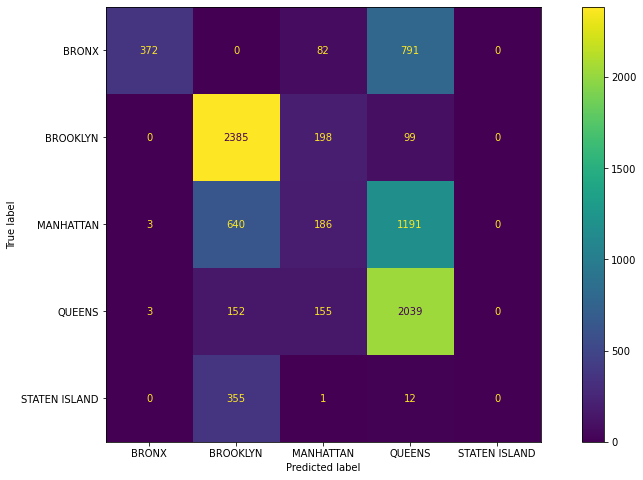

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax)
plt.grid(False)

### Classification Report of our Model

In [35]:
#Classification report of our model
print(classification_report(y_test, pred))

               precision    recall  f1-score   support

        BRONX       0.98      0.30      0.46      1245
     BROOKLYN       0.68      0.89      0.77      2682
    MANHATTAN       0.30      0.09      0.14      2020
       QUEENS       0.49      0.87      0.63      2349
STATEN ISLAND       0.00      0.00      0.00       368

     accuracy                           0.58      8664
    macro avg       0.49      0.43      0.40      8664
 weighted avg       0.55      0.58      0.51      8664

